### Naming the files

In [1]:
file_2d = ['RTRA_Employ_2NAICS_00_05.csv','RTRA_Employ_2NAICS_06_10.csv','RTRA_Employ_2NAICS_11_15.csv','RTRA_Employ_2NAICS_16_20.csv','RTRA_Employ_2NAICS_97_99.csv']
file_3d = ['RTRA_Employ_3NAICS_00_05.csv','RTRA_Employ_3NAICS_06_10.csv','RTRA_Employ_3NAICS_11_15.csv','RTRA_Employ_3NAICS_16_20.csv','RTRA_Employ_3NAICS_97_99.csv']
file_4d = ['RTRA_Employ_4NAICS_00_05.csv','RTRA_Employ_4NAICS_06_10.csv','RTRA_Employ_4NAICS_11_15.csv','RTRA_Employ_4NAICS_16_20.csv','RTRA_Employ_4NAICS_97_99.csv']
file_path = 'A_NEWLY_HIRED_DATA_ANALYST/'

### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
r_2 = pd.DataFrame()
r_3 = pd.DataFrame()
r_4 = pd.DataFrame()

### Reading and combining the files 

In [4]:
for item in file_2d:
    df = pd.read_csv(file_path+item)
    r_2 = pd.concat([r_2,df], ignore_index=True)

In [5]:
r_2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [6]:
for item in file_3d:
    df = pd.read_csv(file_path+item)
    r_3 = pd.concat([r_3, df], ignore_index=True)
for item in file_4d:
    df = pd.read_csv(file_path+item)
    r_4 = pd.concat([r_4, df], ignore_index=True)

In [7]:
r_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         5472 non-null   int64 
 1   SMTH          5472 non-null   int64 
 2   NAICS         5472 non-null   object
 3   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.1+ KB


In [8]:
r_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         28140 non-null  int64 
 1   SMTH          28140 non-null  int64 
 2   NAICS         28140 non-null  object
 3   _EMPLOYMENT_  28140 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 879.5+ KB


In [9]:
r_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85572 entries, 0 to 85571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SYEAR         85572 non-null  int64
 1   SMTH          85572 non-null  int64
 2   NAICS         85572 non-null  int64
 3   _EMPLOYMENT_  85572 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [10]:
r_4.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


### Extracting the code from the name

In [11]:
import re
def stol(df):
    df['code'] = df.NAICS.str.extract(r'\[(.+)\]', expand=False)
    df['code'] = df.code.str.replace('-', ',').astype('str')
    df['code'] = df.code.str.split(',')
    return df

In [12]:
r_2 = stol(r_2)
r_3 = stol(r_3)

In [13]:
r_2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code
0,2000,1,Accommodation and food services [72],148000,[72]
1,2000,1,"Administrative and support, waste management a...",59250,[56]
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,[11]
3,2000,1,"Arts, entertainment and recreation [71]",39500,[71]
4,2000,1,Construction [23],106250,[23]


In [14]:
r_2.code.isna().sum()

0

In [15]:
r_3.code.isna().sum()

0

### Loading excel file with name and code of the industry

In [16]:
lookup = pd.read_excel(file_path+'LMO_Detailed_Industries_by_NAICS.xlsx')
lookup['NAICS'] = lookup['NAICS'].replace(regex='&', value=',').astype('str')
lookup.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


### Creating a dictionary for mapping the code with the industry name

In [17]:
industry_dict = {
    'two_digit' : {}, 
    'three_digit' : {}, 
    'four_digit' : {}
}
code = []
for name, numbers in zip(lookup['LMO_Detailed_Industry'], lookup['NAICS']):
    num_list = numbers.split(',')
    num_list = [x.strip() for x in num_list]
    code.append(num_list)
    for i in range(len(num_list)):
        if len(num_list[i]) == 2:
            industry_dict['two_digit'][num_list[i]] = name
        elif len(num_list[i]) == 3:
            industry_dict['three_digit'][num_list[i]] = name 
        elif len(num_list[i]) == 4:
            industry_dict['four_digit'][num_list[i]] = name
lookup['code'] = code

In [18]:
#industry_dict

In [19]:
lookup.head()

,LMO_Detailed_Industry,NAICS,code
0,Farms,"111 , 112","[111, 112]"
1,"Fishing, hunting and trapping",114,[114]
2,Forestry and logging,113,[113]
3,Support activities for agriculture and forestry,115,[115]
4,Oil and gas extraction,211,[211]


In [20]:
r_4['code'] = r_4.NAICS.astype('str')

### Extracting required rows from the industry tables

In [21]:
def check(v, df1, df2):
    i = 0
    for row in df1.itertuples():
        if v in row.code:
            df2 = pd.concat([df2, df1.loc[i]], axis =1)
        i += 1
    return df2

In [22]:
df_r2 = pd.DataFrame()
df_r3 = pd.DataFrame()
df_r4 = pd.DataFrame()
for lst in lookup['code']:
    for item in lst:
        if len(item) == 2:
            df_r2 = check(item, r_2, df_r2)
        elif len(item) == 3:
            df_r3 = check(item, r_3, df_r3)
        elif len(item) ==4:
            df_r4 = check(item, r_4, df_r4)
df_r2 = df_r2.transpose()
df_r3 = df_r3.transpose()
df_r4 = df_r4.transpose()

In [23]:
r2_c = df_r2.copy()
r3_c = df_r3.copy()
r4_c = df_r4.copy()

### Mapping the NAICS code to the industry name

In [24]:
def input_name(df):
    df['code'] = df['code'].map(lambda x:x[0])
    x = df['code'].iloc[-1]
    if len(x) == 2:
        df['name'] = df['code'].map(industry_dict['two_digit'])
    elif len(x) == 3:
        df['name'] = df['code'].map(industry_dict['three_digit'])
    return df

In [25]:
r2_c = input_name(r2_c)
r3_c = input_name(r3_c)

In [26]:
r4_c['name'] = r4_c['code'].map(industry_dict['four_digit'])

In [27]:
r4_c.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,code,name
118,2000,1,3366,5500,3366,Ship and boat building
430,2000,2,3366,5000,3366,Ship and boat building
742,2000,3,3366,6250,3366,Ship and boat building
1054,2000,4,3366,7750,3366,Ship and boat building
1366,2000,5,3366,7750,3366,Ship and boat building


### Correcting the year and month column

In [ ]:
def date(df):
    df['date'] = pd.to_datetime(df['SYEAR'].astype('str')+df['SMTH'].astype('str'), format='%Y%m')
    df.drop(columns = ['SYEAR','SMTH', 'NAICS'], inplace = True)
    return df

In [29]:
r2_c = date(r2_c)
r3_c = date(r3_c)
r4_c = date(r4_c)

In [30]:
r2_c.head()

,_EMPLOYMENT_,code,name,date
18,10750,22,Utilities,2000-01-01
38,11000,22,Utilities,2000-02-01
58,11000,22,Utilities,2000-03-01
78,10250,22,Utilities,2000-04-01
98,10750,22,Utilities,2000-05-01


In [31]:
r4_c.head()

,_EMPLOYMENT_,code,name,date
118,5500,3366,Ship and boat building,2000-01-01
430,5000,3366,Ship and boat building,2000-02-01
742,6250,3366,Ship and boat building,2000-03-01
1054,7750,3366,Ship and boat building,2000-04-01
1366,7750,3366,Ship and boat building,2000-05-01


### Combining all the tables with required rows into a single table

In [32]:
final_tab = pd.concat([r2_c, r3_c, r4_c])
final_tab.set_index('date', inplace=True)

In [33]:
final_tab.head()

,_EMPLOYMENT_,code,name
date,,,
2000-01-01,10750,22,Utilities
2000-02-01,11000,22,Utilities
2000-03-01,11000,22,Utilities
2000-04-01,10250,22,Utilities
2000-05-01,10750,22,Utilities


### Plotting the total employees in each industry

In [34]:
grouped = final_tab.groupby('name', as_index=False)['_EMPLOYMENT_'].sum().sort_values(by='_EMPLOYMENT_', ascending=False)

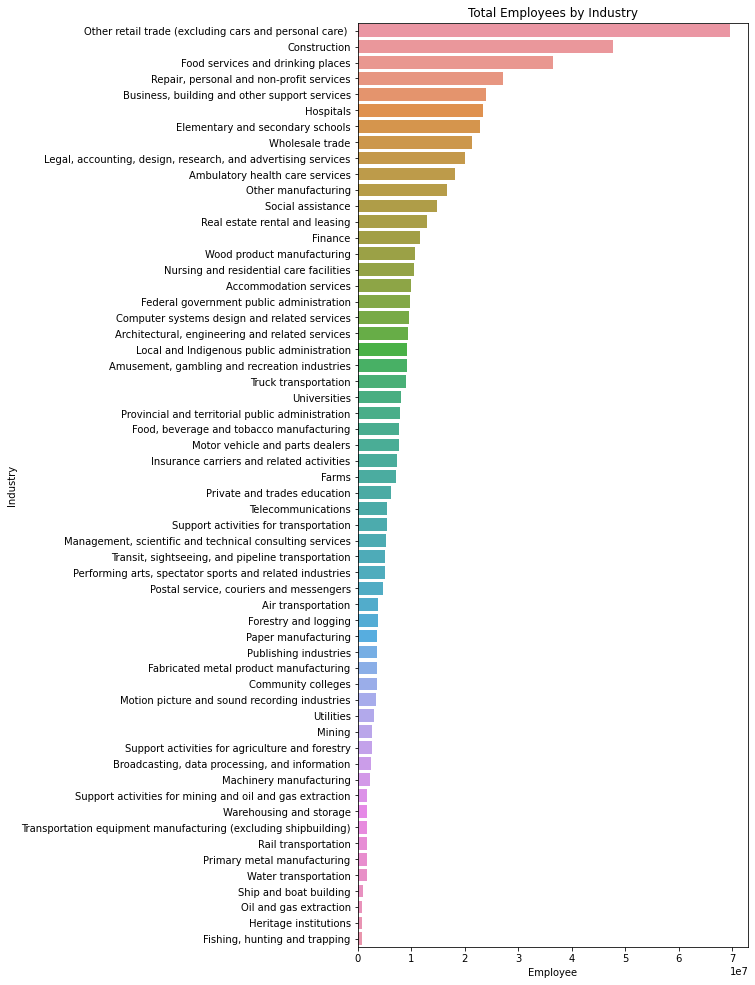

In [35]:
%matplotlib inline
plt.figure(figsize=(7,17))
sns.barplot(x='_EMPLOYMENT_', y='name', data=grouped)
plt.title('Total Employees by Industry')
plt.xlabel('Employee')
plt.ylabel('Industry')
plt.show()

### Selecting top 4 industry for further analysis

In [36]:
construction = final_tab[final_tab['name']=='Construction']
food = final_tab[final_tab['name']=='Food services and drinking places']
repair = final_tab[final_tab['name']=='Repair, personal and non-profit services']
business = final_tab[final_tab['name']=='Business, building and other support services']

In [37]:
construction.head()

,_EMPLOYMENT_,code,name
date,,,
2000-01-01,106250,23,Construction
2000-02-01,115000,23,Construction
2000-03-01,106750,23,Construction
2000-04-01,105500,23,Construction
2000-05-01,113500,23,Construction


### Comparing the average employees year wise

<ipython-input-42-33bf407e5df1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction['_EMPLOYMENT_'] = construction['_EMPLOYMENT_'].astype('int')


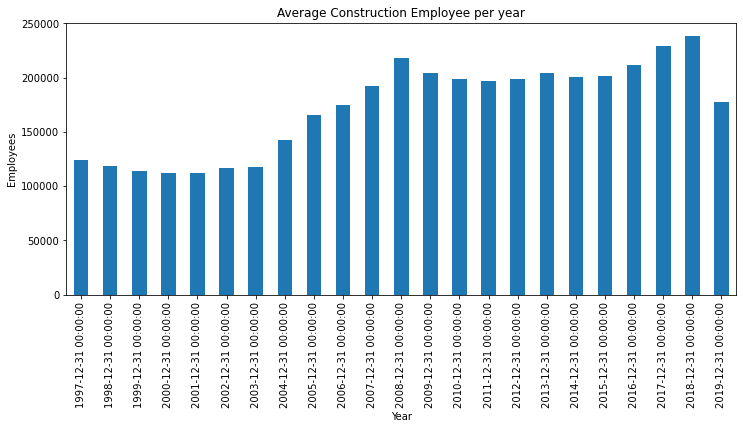

In [42]:
construction['_EMPLOYMENT_'] = construction['_EMPLOYMENT_'].astype('int')
plt.subplots(figsize=(12,5))
construction.resample('Y')['_EMPLOYMENT_'].mean().plot(kind='bar')
plt.title('Average Construction Employee per year')
plt.xlabel('Year')
plt.ylabel('Employees')
plt.show()

### Comparing the total employees every month in top 4 industries

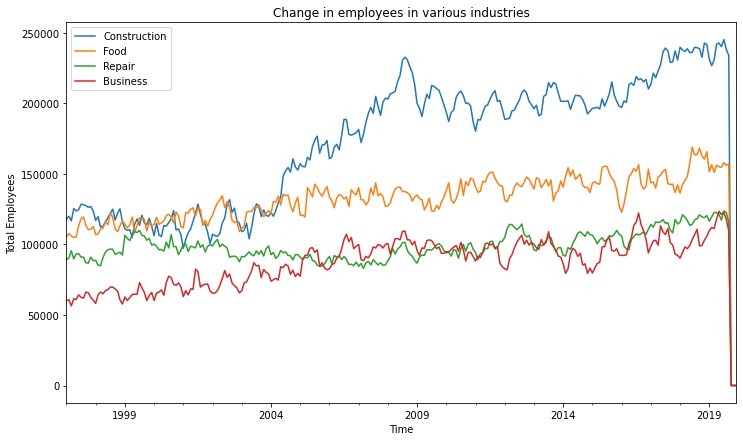

In [39]:
plt.subplots(figsize=(12,7))
construction.resample('M')['_EMPLOYMENT_'].sum().plot(label = 'Construction')
food.resample('M')['_EMPLOYMENT_'].sum().plot(label='Food')
repair.resample('M')['_EMPLOYMENT_'].sum().plot(label='Repair')
business.resample('M')['_EMPLOYMENT_'].sum().plot(label='Business')
plt.title('Change in employees in various industries')
plt.ylabel('Total Employees')
plt.xlabel('Time')
plt.legend()
plt.show()

In [43]:
construction.sort_index()

,_EMPLOYMENT_,code,name
date,,,
1997-01-01,118000,23,Construction
1997-02-01,120000,23,Construction
1997-03-01,116750,23,Construction
1997-04-01,125500,23,Construction
1997-05-01,123750,23,Construction
...,...,...,...
2019-08-01,238250,23,Construction
2019-09-01,234000,23,Construction
2019-10-01,0,23,Construction


### Comparing the frequency of employees every month 

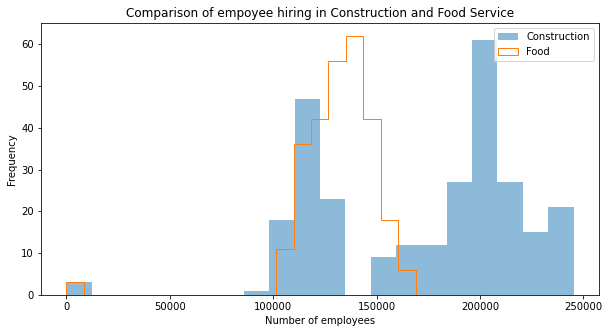

In [41]:
plt.subplots(figsize=(10,5))
construction['_EMPLOYMENT_'].plot(kind='hist', bins=20, alpha=0.5, label='Construction')
food['_EMPLOYMENT_'].plot(kind='hist', bins=20, histtype='step', label='Food')
plt.title('Comparison of empoyee hiring in Construction and Food Service')
plt.xlabel('Number of employees')
plt.legend()
plt.show()